In [25]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def load_imdb_data(path):
    texts = []
    labels = []
    for label_type in ['pos', 'neg']:
        folder_path = os.path.join(path, label_type)
        for fname in os.listdir(folder_path):
            if fname.endswith('.txt'):
                with open(os.path.join(folder_path, fname), encoding='utf-8') as f:
                    texts.append(f.read())
                    labels.append(1 if label_type == 'pos' else 0)
    return pd.DataFrame({'text': texts, 'label': labels})

In [27]:
train_df = load_imdb_data(r"C:\Users\khtug\Desktop\Project\aclImdb\train")
test_df = load_imdb_data(r"C:\Users\khtug\Desktop\Project\aclImdb\test")

In [28]:
print("Train samples:", len(train_df))
print("Test samples:", len(test_df))
train_df.head()

Train samples: 25000
Test samples: 25000


,text,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [29]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

In [30]:
y_train = train_df['label']
y_test = test_df['label']

In [31]:
print("TF-IDF vectorization done. Feature size:", X_train.shape[1])

TF-IDF vectorization done. Feature size: 10000


In [32]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

print("Training complete!")

Training complete!


In [33]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8792
Test F1 Score: 0.8794

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



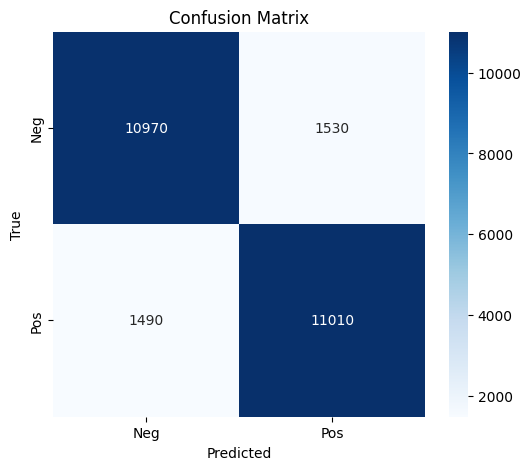

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neg','Pos'], yticklabels=['Neg','Pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [36]:
def predict_sentiment(text):
    vec = vectorizer.transform([text])
    pred = clf.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

samples = [
    "I absolutely loved this movie! Amazing story and acting.",
    "Worst movie ever. I want my time back.",
    "It was okay, some parts were good but mostly boring."
]

for text in samples:
    print(f"\nText: {text}\nPredicted Sentiment: {predict_sentiment(text)}")


Text: I absolutely loved this movie! Amazing story and acting.
Predicted Sentiment: Positive

Text: Worst movie ever. I want my time back.
Predicted Sentiment: Negative

Text: It was okay, some parts were good but mostly boring.
Predicted Sentiment: Negative


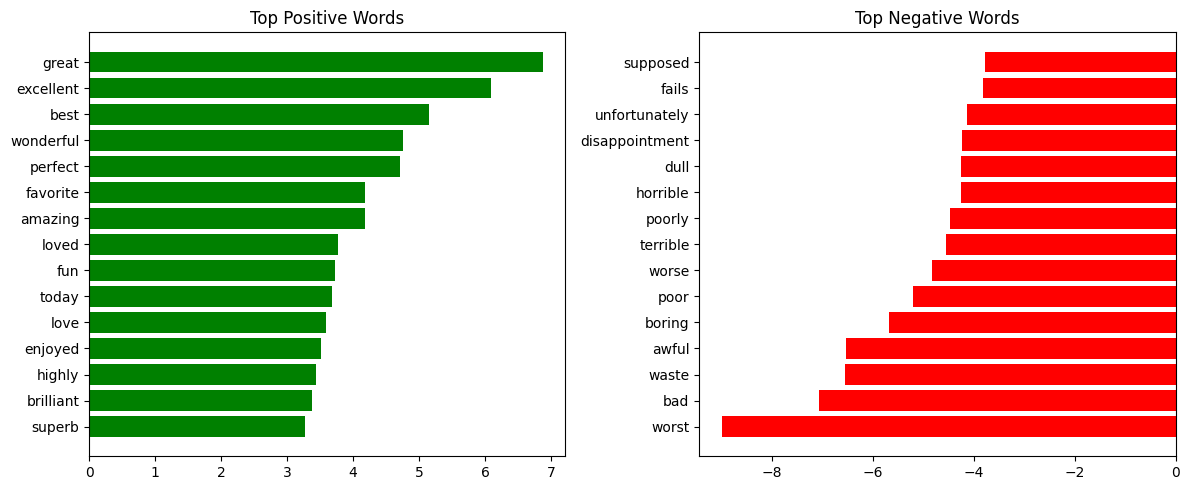

In [37]:
feature_names = vectorizer.get_feature_names_out()
coef = clf.coef_[0]

top_pos = np.argsort(coef)[-15:]
top_neg = np.argsort(coef)[:15]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.barh(feature_names[top_pos], coef[top_pos], color='green')
plt.title("Top Positive Words")

plt.subplot(1,2,2)
plt.barh(feature_names[top_neg], coef[top_neg], color='red')
plt.title("Top Negative Words")

plt.tight_layout()
plt.show()

In [38]:
success_cases = [
    "The film was absolutely fantastic with great acting.",
    "A wonderful experience from start to finish.",
    "Terrible movie. I regret watching it.",
]

for text in success_cases:
    print(f"Review: {text}")
    print("Predicted:", predict_sentiment(text))
    print("-"*50)

Review: The film was absolutely fantastic with great acting.
Predicted: Positive
--------------------------------------------------
Review: A wonderful experience from start to finish.
Predicted: Positive
--------------------------------------------------
Review: Terrible movie. I regret watching it.
Predicted: Negative
--------------------------------------------------


In [39]:
failure_cases = [
    "I really wanted to like this movie, but it just didn’t work for me.",
    "Great… another movie that wastes my time.",
    "The ideas were good, but execution was awful."
]

for text in failure_cases:
    print(f"Review: {text}")
    print("Predicted:", predict_sentiment(text))
    print("-"*50)

Review: I really wanted to like this movie, but it just didn’t work for me.
Predicted: Negative
--------------------------------------------------
Review: Great… another movie that wastes my time.
Predicted: Positive
--------------------------------------------------
Review: The ideas were good, but execution was awful.
Predicted: Negative
--------------------------------------------------


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)
pred_lr = clf_lr.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)

print("Logistic Regression Accuracy:", acc_lr)

Logistic Regression Accuracy: 0.8792


In [41]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
pred_nb = clf_nb.predict(X_test)
acc_nb = accuracy_score(y_test, pred_nb)

print("Naive Bayes Accuracy:", acc_nb)

Naive Bayes Accuracy: 0.83444


In [42]:
from sklearn.svm import LinearSVC

clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)
pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(y_test, pred_svm)

print("Linear SVM Accuracy:", acc_svm)

C:\Users\khtug\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM Accuracy: 0.85948


In [43]:
print("\n=== Baseline Model Accuracies ===")
print("Logistic Regression:", acc_lr)
print("Naive Bayes:", acc_nb)
print("Linear SVM:", acc_svm)


=== Baseline Model Accuracies ===
Logistic Regression: 0.8792
Naive Bayes: 0.83444
Linear SVM: 0.85948


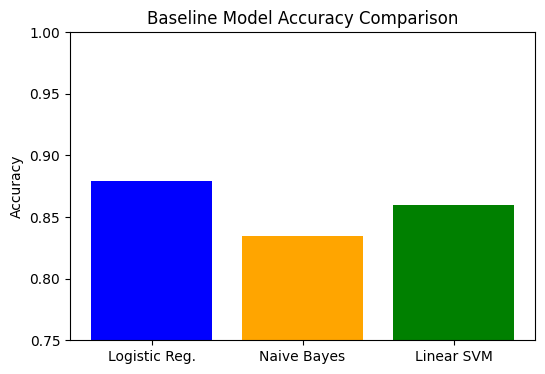

In [44]:
import matplotlib.pyplot as plt

models = ['Logistic Reg.', 'Naive Bayes', 'Linear SVM']
accuracies = [acc_lr, acc_nb, acc_svm]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['blue','orange','green'])
plt.ylabel("Accuracy")
plt.title("Baseline Model Accuracy Comparison")
plt.ylim(0.75, 1.0)
plt.show()

In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd

# Use your actual trained models
# clf_lr  = LogisticRegression(...)
# clf_nb  = MultinomialNB(...)
# clf_svm = LinearSVC(...)

# Make predictions
pred_lr  = clf_lr.predict(X_test)
pred_nb  = clf_nb.predict(X_test)
pred_svm = clf_svm.predict(X_test)

# Compute F1 scores
f1_lr  = f1_score(y_test, pred_lr, average='weighted')
f1_nb  = f1_score(y_test, pred_nb, average='weighted')
f1_svm = f1_score(y_test, pred_svm, average='weighted')

# Compute Precision
prec_lr  = precision_score(y_test, pred_lr, average='weighted')
prec_nb  = precision_score(y_test, pred_nb, average='weighted')
prec_svm = precision_score(y_test, pred_svm, average='weighted')

# Compute Recall
rec_lr  = recall_score(y_test, pred_lr, average='weighted')
rec_nb  = recall_score(y_test, pred_nb, average='weighted')
rec_svm = recall_score(y_test, pred_svm, average='weighted')

# Print results
print("=== F1 Scores ===")
print("Logistic Regression:", f1_lr)
print("Naive Bayes:", f1_nb)
print("Linear SVM:", f1_svm)

print("\n=== Precision ===")
print("Logistic Regression:", prec_lr)
print("Naive Bayes:", prec_nb)
print("Linear SVM:", prec_svm)

print("\n=== Recall ===")
print("Logistic Regression:", rec_lr)
print("Naive Bayes:", rec_nb)
print("Linear SVM:", rec_svm)

# Create a results table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Linear SVM'],
    'F1 Score': [f1_lr, f1_nb, f1_svm],
    'Precision': [prec_lr, prec_nb, prec_svm],
    'Recall': [rec_lr, rec_nb, rec_svm]
})

print("\n=== Results Table ===")
print(results)

=== F1 Scores ===
Logistic Regression: 0.8791996907512084
Naive Bayes: 0.8342198649352431
Linear SVM: 0.8594541573299431

=== Precision ===
Logistic Regression: 0.8792038830477623
Naive Bayes: 0.8362258617819901
Linear SVM: 0.859744590131472

=== Recall ===
Logistic Regression: 0.8792
Naive Bayes: 0.83444
Linear SVM: 0.85948

=== Results Table ===
                 Model  F1 Score  Precision   Recall
0  Logistic Regression  0.879200   0.879204  0.87920
1          Naive Bayes  0.834220   0.836226  0.83444
2           Linear SVM  0.859454   0.859745  0.85948


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

acc_5k = None
acc_10k = None
acc_20k = None

for size in [5000, 10000, 20000]:
    print(f"\nTraining with vocab size = {size}")
    
    # Create TF-IDF with different vocab sizes
    vectorizer_tmp = TfidfVectorizer(max_features=size, stop_words='english')
    X_train_tmp = vectorizer_tmp.fit_transform(train_df['text'])
    X_test_tmp = vectorizer_tmp.transform(test_df['text'])
    
    # Train logistic regression
    clf_tmp = LogisticRegression(max_iter=1000)
    clf_tmp.fit(X_train_tmp, y_train)
    
    # Evaluate
    pred_tmp = clf_tmp.predict(X_test_tmp)
    acc_tmp = accuracy_score(y_test, pred_tmp)
    
    # Store results
    if size == 5000:
        acc_5k = acc_tmp
    elif size == 10000:
        acc_10k = acc_tmp
    elif size == 20000:
        acc_20k = acc_tmp
    
    print(f"Accuracy for vocab {size}: {acc_tmp:.4f}")


Training with vocab size = 5000
Accuracy for vocab 5000: 0.8778

Training with vocab size = 10000
Accuracy for vocab 10000: 0.8792

Training with vocab size = 20000
Accuracy for vocab 20000: 0.8800


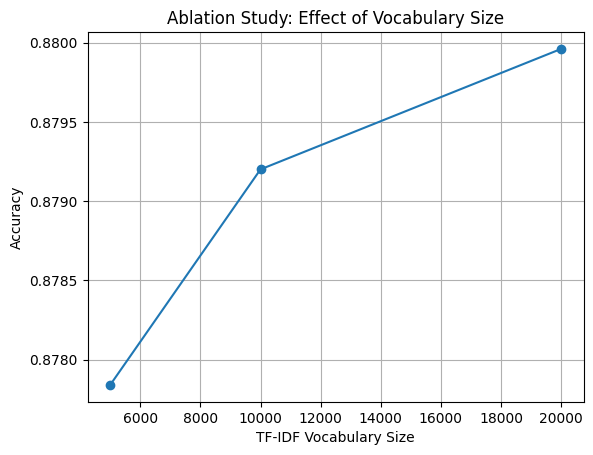

In [47]:
import matplotlib.pyplot as plt

vocab_sizes = [5000, 10000, 20000]
accs = [acc_5k, acc_10k, acc_20k]

plt.plot(vocab_sizes, accs, marker='o')
plt.xlabel("TF-IDF Vocabulary Size")
plt.ylabel("Accuracy")
plt.title("Ablation Study: Effect of Vocabulary Size")
plt.grid(True)
plt.show()